In [1]:
%load_ext autoreload
%autoreload 2
import os

os.chdir("/home/jorge/thesis")

import torch
from text3d2video.util import read_obj_with_uvs

torch.set_grad_enabled(False)

# read mesh
mesh_path = "data/meshes/cat_statue.obj"

device = "cuda"
mesh, verts_uvs, faces_uvs = read_obj_with_uvs(mesh_path)

/home/jorge/miniconda3/envs/thesis4/lib/python3.9/site-packages/pytorch3d/io/obj_io.py:550: UserWarning: Mtl file does not exist: data/meshes/cat_statue.mtl
  warnings.warn(f"Mtl file does not exist: {f}")


In [2]:
from text3d2video.backprojection import rasterize_uv_mesh
from text3d2video.rendering import downsample_frags

factors = [1, 2, 4, 8]
frags = []
for factor in factors:
    frags_hd = rasterize_uv_mesh(verts_uvs, faces_uvs, uv_res=int(500 * factor))
    frags_ld = downsample_frags(frags_hd, factor)
    frags.append(frags_ld)

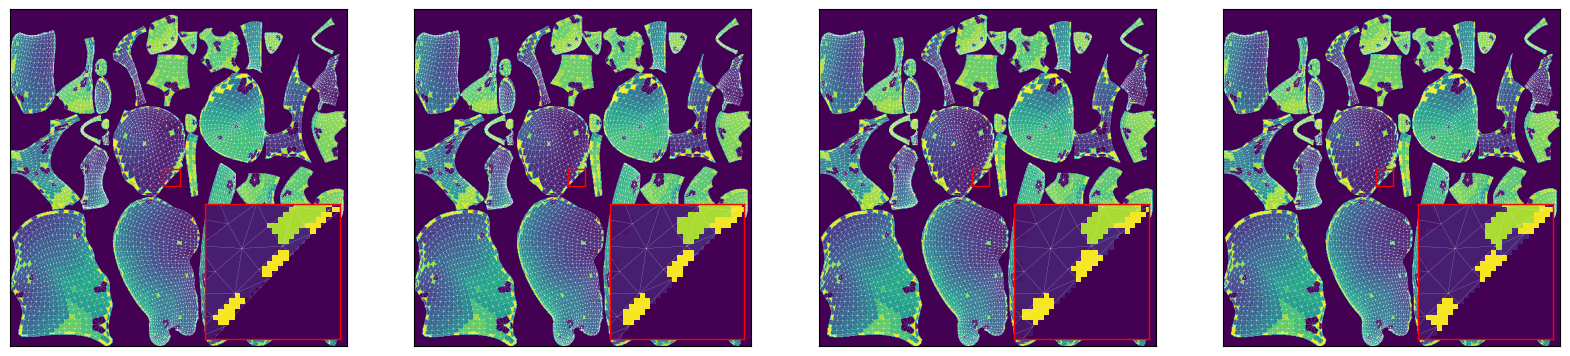

In [57]:
from matplotlib import pyplot as plt
from text3d2video.utilities.ipython_utils import display_ims
from text3d2video.utilities.matplotlib_utils import add_zoom_inset, bbox_around_point, mpl_uv_triangulation

pix_to_faces = [f.pix_to_face[0,...,0].cpu() for f in frags]

triang = mpl_uv_triangulation(verts_uvs, faces_uvs)

fig, axs = plt.subplots(1, len(factors), figsize=(20, 5))
for i, ax in enumerate(axs):
    ax.imshow(pix_to_faces[i], extent=[0,1, 0, 1])
    ax.triplot(triang, lw=0.1, color='white')
    ax.set_xticks([])
    ax.set_yticks([])

for ax in axs:
    add_zoom_inset(ax, bbox_around_point([0.48, 0.5], 0.05))